In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

# Data viz
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import scipy.stats as stats


%matplotlib inline
np.warnings.filterwarnings('ignore')

# EDX

In [2]:
#Εισαγωγή Πίνακα EDX
df=pd.read_csv('EDX.csv')

In [3]:
df

,course_name,course_level,course_effort (hours/week),course_effort_mean(hours),course_length,course_language,course_subtitle,course_price,course_partner,course_enrollments
0,Future Skills,Intermediate,3-6,4.5,2.0,Deutsch,Deutsch,228.0,seakademieX,not-mentioned
1,Venture Capital,Introductory,5-6,5.5,7.0,Deutsch,Deutsch,99.0,RWTH Aachen University,not-mentioned
2,Der Start-up CFO,Introductory,5-6,5.5,7.0,Deutsch,Deutsch,99.0,RWTH Aachen University,not-mentioned
3,Die digitale Welt mit demThymio Roboterentdecken,Introductory,4-6,5.0,6.0,Deutsch,Deutsch,50.0,Γ‰cole polytechnique fΓ©dΓ©rale de Lausanne,not-mentioned
4,Religionsphilosophie,Introductory,5-6,5.5,4.0,Deutsch,Deutsch,49.0,RWTH Aachen University,not-mentioned
...,...,...,...,...,...,...,...,...,...,...
2783,COVID-19: Comunicarnossin daΓ±o durante lapand...,Introductory,4-5,4.5,1.0,Spanish,Spanish,10.0,Pontificia Universidad Javeriana,not-mentioned
2784,Covid - 19: VentilaciΓ³nmecΓ΅nica para nointen...,Introductory,3-5,4.0,2.0,Spanish,Spanish,10.0,Pontificia Universidad Javeriana,not-mentioned
2785,GuΓ­a de herramientaspara la colaboraciΓ³nempr...,Intermediate,3-5,4.0,2.0,Spanish,Spanish,10.0,LOGYCA,not-mentioned
2786,COVID - 19: Abordajeinicial del paciente conin...,Introductory,3-5,4.0,1.0,Spanish,Spanish,10.0,Pontificia Universidad Javeriana,not-mentioned


In [4]:
df.columns

Index(['course_name ', '  course_level ', '  course_effort (hours/week) ',
       'course_effort_mean(hours)', '  course_length ', '  course_language  ',
       ' course_subtitle ', '  course_price ', '  course_partner ',
       '  course_enrollments'],
      dtype='object')

In [5]:
#διαγραφή στήλης course_enrollments
df.drop(['  course_enrollments'], axis=1, inplace=True)
df.drop(['  course_language  '], axis=1, inplace=True)
df.drop([' course_subtitle '], axis=1, inplace=True)


In [6]:
# Υπολογίζουμε το εύρος των δεδομένων
data_range = df['  course_price '].max() - df['  course_price '].min()

# Υπολογίζουμε την απόκλιση των δεδομένων
data_std = df['  course_price '].std()

# Ορίζουμε το κατώτατο και το ανώτατο εύρος για τα outliers
lower_threshold = df['  course_price '].mean() - 3 * data_std
upper_threshold = df['  course_price '].mean() + 3 * data_std

# Φιλτράρουμε τα outliers από τα δεδομένα μας και αποθηκεύουμε το αποτέλεσμα σε ένα νέο DataFrame
df_no_outliers = df[(df['  course_price '] >= lower_threshold) & (df['  course_price '] <= upper_threshold)]
df=df_no_outliers

In [7]:
# Αφαίρεση γραμμών με NaN τιμές
df = df.dropna()

# Εκτύπωση του αποτελέσματος
print(df)

                                           course_name     course_level   \
0                                        Future Skills     Intermediate    
1                                      Venture Capital     Introductory    
2                                     Der Start-up CFO     Introductory    
3     Die digitale Welt mit demThymio Roboterentdecken     Introductory    
4                                 Religionsphilosophie     Introductory    
...                                                 ...              ...   
2783  COVID-19: Comunicarnossin daΓ±o durante lapand...    Introductory    
2784  Covid - 19: VentilaciΓ³nmecΓ΅nica para nointen...    Introductory    
2785  GuΓ­a de herramientaspara la colaboraciΓ³nempr...    Intermediate    
2786  COVID - 19: Abordajeinicial del paciente conin...    Introductory    
2787       Interpreting VernacularArchitecture in Asia     Introductory    

       course_effort (hours/week)   course_effort_mean(hours)  \
0                     

<AxesSubplot:>

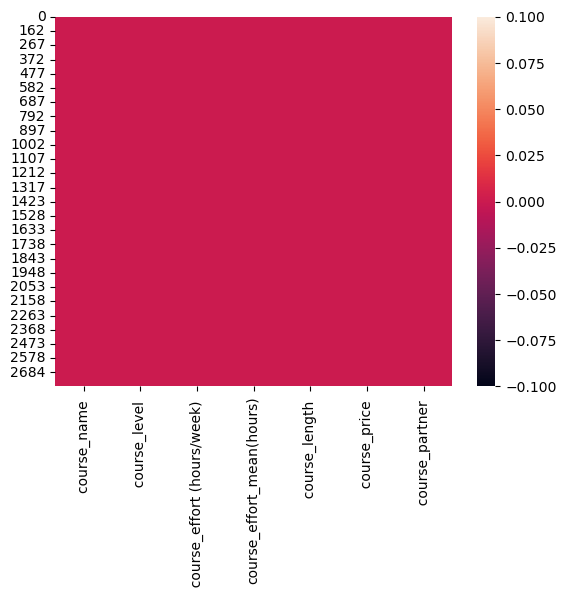

In [8]:
#Δημιουργία  heatmap που δείχνει αν υπάρχουν άλλες τιμές NaN (ή απουσιάζουσες τιμές)
sns.heatmap(df.isnull())

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2729 entries, 0 to 2787
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   course_name                    2729 non-null   object 
 1     course_level                 2729 non-null   object 
 2     course_effort (hours/week)   2729 non-null   object 
 3   course_effort_mean(hours)      2729 non-null   float64
 4     course_length                2729 non-null   float64
 5     course_price                 2729 non-null   float64
 6     course_partner               2729 non-null   object 
dtypes: float64(3), object(4)
memory usage: 170.6+ KB


In [10]:
#Μετατροπή αριθμητικών μεταβλητών σε integer
df['  course_price '] = df['  course_price '].astype(int)
df['  course_length '] = df['  course_length '].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2729 entries, 0 to 2787
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   course_name                    2729 non-null   object 
 1     course_level                 2729 non-null   object 
 2     course_effort (hours/week)   2729 non-null   object 
 3   course_effort_mean(hours)      2729 non-null   float64
 4     course_length                2729 non-null   int32  
 5     course_price                 2729 non-null   int32  
 6     course_partner               2729 non-null   object 
dtypes: float64(1), int32(2), object(4)
memory usage: 149.2+ KB


In [12]:
# Δημιουργία μιας νέας μεταβλητής 'course_load_Edx' η οποία εκφράζει τον φόρτο μαθήματος
df['course_load_Edx'] =df['  course_length '] * df['course_effort_mean(hours)'] 
df['course_load_Edx']

0        9.0
1       38.5
2       38.5
3       30.0
4       22.0
        ... 
2783     4.5
2784     8.0
2785     8.0
2786     4.0
2787    15.0
Name: course_load_Edx, Length: 2729, dtype: float64

In [13]:
#Ελέγχω αν υπάρχουν 0 τιμές στη μεταβλητή αυτή
print((df['course_load_Edx'] == 0).any())

False


In [14]:
# Δημιουργία ενός δείκτη 't_Edx' που είναι η τιμή του μαθήματος προς τον φόρτο μαθήματος
df['t_Edx'] = df['  course_price '] / df['course_load_Edx']
df['t_Edx']

0       25.333333
1        2.571429
2        2.571429
3        1.666667
4        2.227273
          ...    
2783     2.222222
2784     1.250000
2785     1.250000
2786     2.500000
2787     3.333333
Name: t_Edx, Length: 2729, dtype: float64

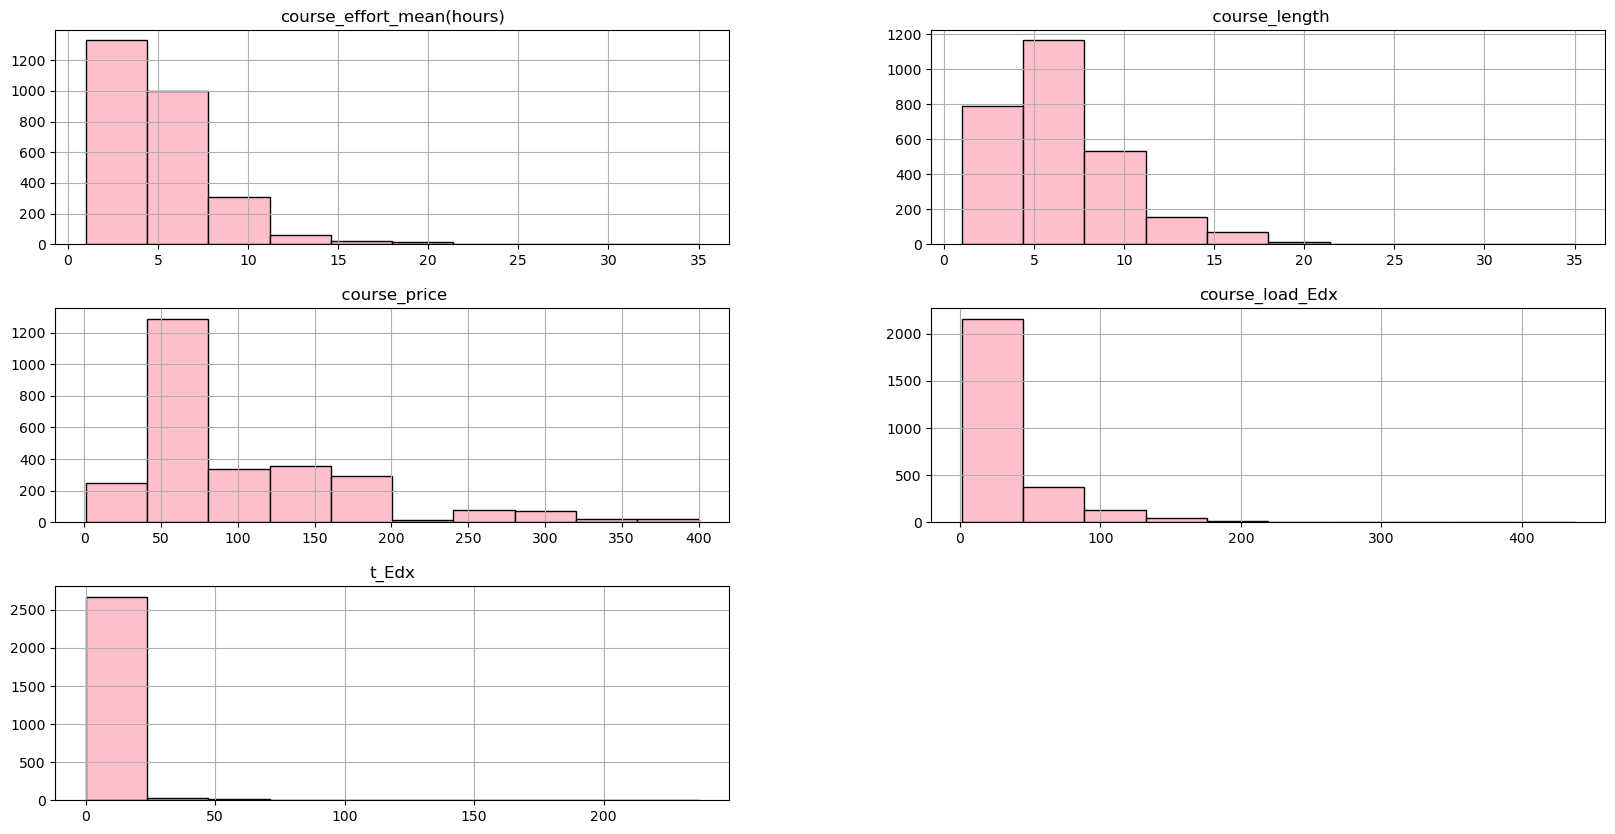

,course_effort_mean(hours),course_length,course_price,course_load_Edx,t_Edx
count,2729.000000,2729.000000,2729.000000,2729.000000,2729.000000
mean,5.062294,6.559912,100.234152,34.801392,5.291405
std,2.976164,3.342193,75.484849,32.454866,10.872863
min,1.000000,1.000000,1.000000,1.500000,0.008333
25%,3.000000,4.000000,49.000000,16.000000,1.633333
50%,4.500000,6.000000,50.000000,25.000000,2.857143
75%,6.500000,8.000000,149.000000,42.000000,5.657143
max,35.000000,35.000000,400.000000,437.500000,236.666667


In [15]:
# Descriptive Analysis_Numbers
# graphical  of all numeric features
numbers = ['course_effort_mean(hours)','  course_length ', '  course_price ','course_load_Edx','t_Edx']
df.loc[:,numbers].hist(color='pink', figsize=(20,10), edgecolor='black')
plt.show()

#descriptive analysis
display(df[numbers].describe())

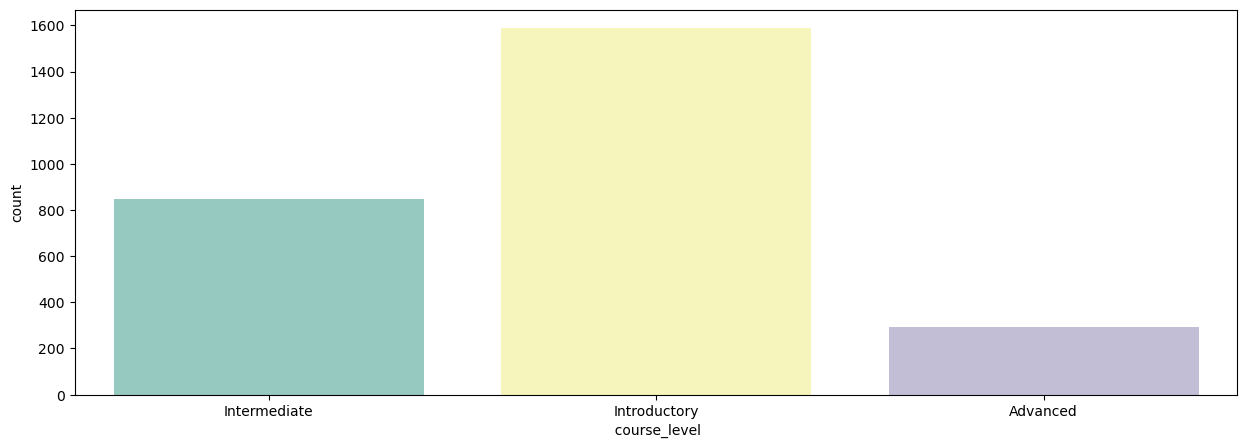

,course_level,percentage
Introductory,1589,58.226457
Intermediate,846,31.000366
Advanced,294,10.773177


In [16]:
#Descriptive Analysis_booleans
df['  course_level '] = df['  course_level '].replace({'  Introductory ': 'Introductory','  Intermediate ': 'Intermediate', '  Advanced ': 'Advanced'})
booleans = ['  course_level ']

fig = plt.subplots(1, figsize=(15,5))

sns.countplot(df['  course_level '],  palette='Set3')
plt.show()

level = pd.DataFrame(df['  course_level '].value_counts())
level['percentage'] = level['  course_level '] / level['  course_level '].sum() * 100
level

In [17]:
df

,course_name,course_level,course_effort (hours/week),course_effort_mean(hours),course_length,course_price,course_partner,course_load_Edx,t_Edx
0,Future Skills,Intermediate,3-6,4.5,2,228,seakademieX,9.0,25.333333
1,Venture Capital,Introductory,5-6,5.5,7,99,RWTH Aachen University,38.5,2.571429
2,Der Start-up CFO,Introductory,5-6,5.5,7,99,RWTH Aachen University,38.5,2.571429
3,Die digitale Welt mit demThymio Roboterentdecken,Introductory,4-6,5.0,6,50,Γ‰cole polytechnique fΓ©dΓ©rale de Lausanne,30.0,1.666667
4,Religionsphilosophie,Introductory,5-6,5.5,4,49,RWTH Aachen University,22.0,2.227273
...,...,...,...,...,...,...,...,...,...
2783,COVID-19: Comunicarnossin daΓ±o durante lapand...,Introductory,4-5,4.5,1,10,Pontificia Universidad Javeriana,4.5,2.222222
2784,Covid - 19: VentilaciΓ³nmecΓ΅nica para nointen...,Introductory,3-5,4.0,2,10,Pontificia Universidad Javeriana,8.0,1.250000
2785,GuΓ­a de herramientaspara la colaboraciΓ³nempr...,Intermediate,3-5,4.0,2,10,LOGYCA,8.0,1.250000
2786,COVID - 19: Abordajeinicial del paciente conin...,Introductory,3-5,4.0,1,10,Pontificia Universidad Javeriana,4.0,2.500000


# UDEMY

In [18]:
#Read data_UDEMY
df1=pd.read_csv('UDEMY.csv')

In [19]:
df1

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [21]:
# Finding the number of courses where reviews count is greater than subscribers count
reviews_subscribers = (df1['num_reviews'] > df1['num_subscribers'])
reviews_subscribers.sum()

0

In [22]:
# Checking if all the ID column values are unique
df1['course_id'].unique().size

3672

In [23]:
df2 = df1[df1.duplicated('course_id')]

In [24]:
df2

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03T00:55:31Z,Web Development


In [25]:
#To remove duplicates and keep first occurrences
df1=df1.drop_duplicates(subset=['course_id'], keep='first')

In [26]:
#Convert argument to datetime
df1['published_timestamp'] = pd.to_datetime(df1['published_timestamp'])

In [27]:
#remove course_id,url
df1.drop(["course_id"], axis=1, inplace=True)
df1.drop(["url"], axis=1, inplace=True)

<AxesSubplot:>

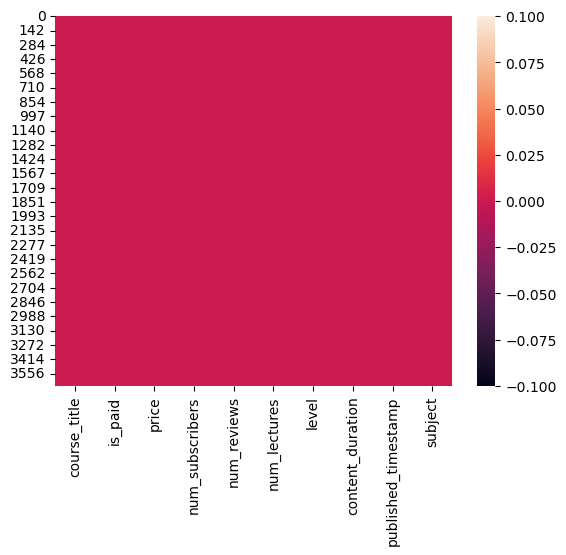

In [28]:
sns.heatmap(df1.isnull())

In [29]:
#Ελέγχω αν υπάρχουν 0 τιμές στη μεταβλητή content_duration
print((df1['content_duration'] == 0).any())
df1 = df1[df1['content_duration'] != 0]
df1

True


,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...
3673,Learn jQuery from Scratch - Master of JavaScri...,True,100,1040,14,21,All Levels,2.0,2016-06-14 17:36:46+00:00,Web Development
3674,How To Design A WordPress Website With No Codi...,True,25,306,3,42,Beginner Level,3.5,2017-03-10 22:24:30+00:00,Web Development
3675,Learn and Build using Polymer,True,40,513,169,48,All Levels,3.5,2015-12-30 16:41:42+00:00,Web Development
3676,CSS Animations: Create Amazing Effects on Your...,True,50,300,31,38,All Levels,3.0,2016-08-11 19:06:15+00:00,Web Development


In [30]:
df1['t_Udemy'] = df1['price'] / df1['content_duration']

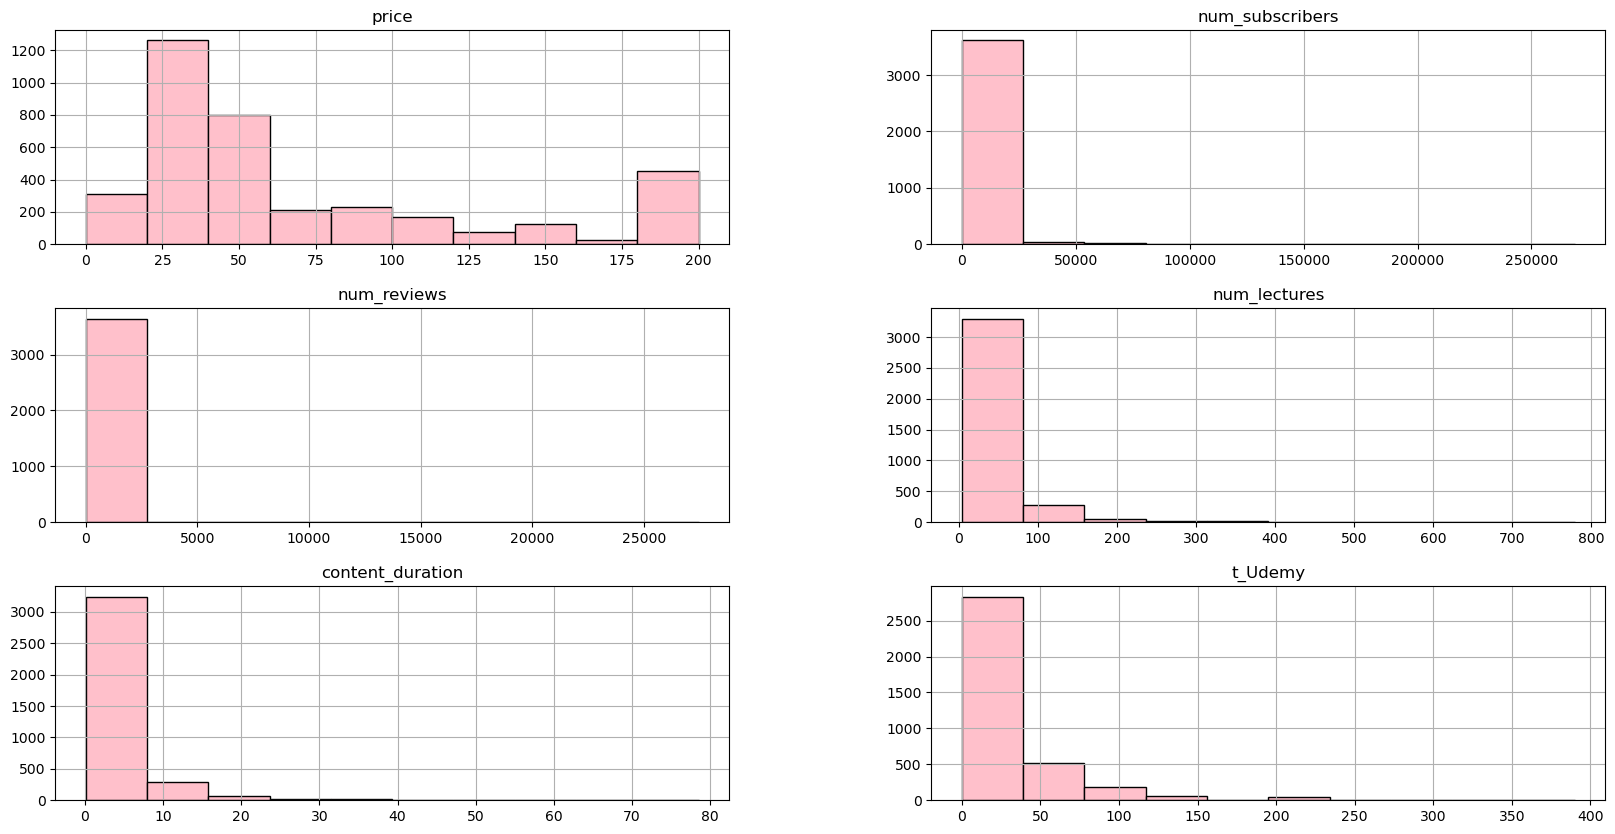

,price,num_subscribers,num_reviews,num_lectures,content_duration,t_Udemy
count,3671.00000,3671.000000,3671.000000,3671.000000,3671.000000,3671.000000
mean,66.11550,3191.456007,156.414056,40.151185,4.098720,29.998664
std,61.03949,9489.251824,936.302626,50.419616,6.058277,38.986154
min,0.00000,0.000000,0.000000,4.000000,0.133333,0.000000
25%,20.00000,112.000000,4.000000,15.000000,1.000000,8.000000
50%,45.00000,912.000000,18.000000,25.000000,2.000000,20.000000
75%,95.00000,2550.500000,67.000000,46.000000,4.500000,35.714286
max,200.00000,268923.000000,27445.000000,779.000000,78.500000,390.000000


In [31]:
# Descriptive Analysis_Numbers
# graphical  of all numeric features
numbers1 = ['price','num_subscribers', 'num_reviews','num_lectures','content_duration','t_Udemy']
df1.loc[:,numbers1].hist(color='pink', figsize=(20,10), edgecolor='black')
plt.show()

#descriptive analysis
display(df1[numbers1].describe())

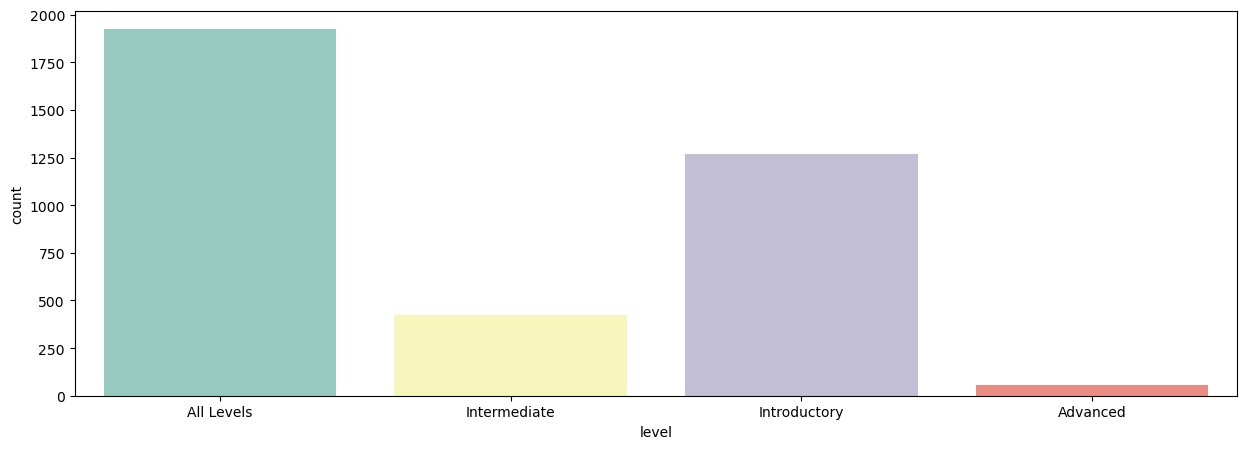

,level,percentage
All Levels,1924,52.410787
Introductory,1268,34.540997
Intermediate,421,11.468265
Advanced,58,1.579951


In [32]:
# Μετανομασία των στοιχε΄ιων της μεταβλητής 'level'
df1['level'] = df1['level'].replace({'Beginner Level': 'Introductory', 'Intermediate Level': 'Intermediate', 'Expert Level': 'Advanced'})

#Descriptive Analysis_booleans
booleans = ['level']

fig = plt.subplots(1, figsize=(15,5))

sns.countplot(df1['level'],  palette='Set3')
plt.show()

level1 = pd.DataFrame(df1['level'].value_counts())
level1['percentage'] = level1['level'] / level1['level'].sum() * 100
level1

#### Στην Udemy πάνω από το 50% των μαθημάτων αφορούν μαθητές όλων των επιπέδων, πάνω από 30% αρχάριους μαθητές ενώ μόνο το 1% των μαθημάτων αφορά εξιδικευμένους .

#### Στην πλατφόρμα Edx κοντά στο 60% των μαθημάτων αφορούν αρχάριους, ενώ μόνο το 10.77% των μαθημάτων αφορούν εξιδικευμένους φοιτητές.

### Welch's t-test --> Price_EDX VS Price_UDEMY
### Υπάρχει στατιστικά σημαντική διαφορά στην τιμή των μαθημάτων μεταξύ των δύο πλατφορμών;

In [33]:
from scipy.stats import normaltest
a=df['  course_price ']
b=df1['price']
# Έλεγχος κανονικότητας για τη μεταβλητή a
stat_a, p_a = normaltest(a)
print("Normality test for variable a:")
print(f"Statistics={stat_a:.3f}, p-value={p_a:.3f}")
if p_a > 0.05:
    print("Η μεταβλητή a κατανέμεται κανονικά")
else:
    print("Η μεταβλητή a δεν κατανέμεται κανονικά")

    # Έλεγχος κανονικότητας για τη μεταβλητή b
stat_b, p_b = normaltest(b)
print("Normality test for variable b:")
print(f"Statistics={stat_b:.3f}, p-value={p_b:.3f}")
if p_b > 0.05:
    print("Η μεταβλητή b κατανέμεται κανονικά")
else:
    print("Η μεταβλητή b δεν κατανέμεται κανονικά")

Normality test for variable a:
Statistics=649.847, p-value=0.000
Η μεταβλητή a δεν κατανέμεται κανονικά
Normality test for variable b:
Statistics=541.324, p-value=0.000
Η μεταβλητή b δεν κατανέμεται κανονικά


In [34]:
# Έλεγχος ομοιομορφίας διασποράς
if a.var() == b.var():
    print("Τα δείγματα έχουν περίπου ίδια διασπορά.")
else:
    print("Τα δείγματα δεν έχουν περίπου ίδια διασπορά.")

Τα δείγματα δεν έχουν περίπου ίδια διασπορά.


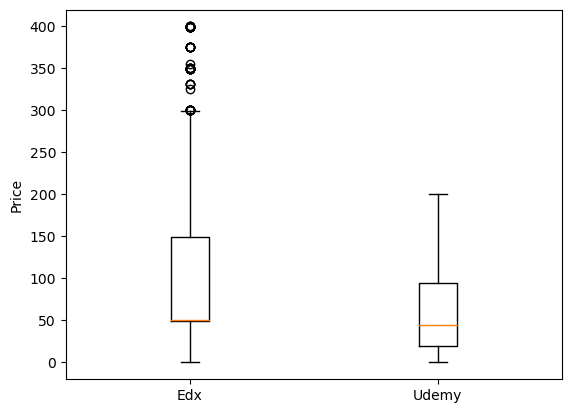

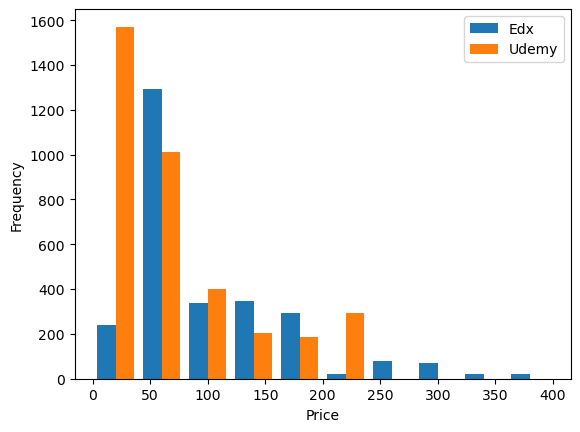

               Edx       Udemy
count  2729.000000  3671.00000
mean    100.234152    66.11550
std      75.484849    61.03949
min       1.000000     0.00000
25%      49.000000    20.00000
50%      50.000000    45.00000
75%     149.000000    95.00000
max     400.000000   200.00000


In [35]:
# Συνδυασμένο boxplot για τις δύο πλατφόρμες
data = [a, b]
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(['Edx','Udemy'])
ax.set_ylabel('Price')
plt.show()

# Ιστόγραμμα
plt.hist(data, bins=10)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend(['Edx','Udemy'])
plt.show()

# Περιγραφική στατιστική για την μεταβλητή κόστος στις δύο πλατφόρμες
df_price = pd.DataFrame({'Edx': a, 'Udemy': b})
print(df_price.describe())

In [36]:
#Welch's t-test
t, p = stats.ttest_ind(a, b, equal_var=False)
print("Welch's t-test")
print("t-value:", t)
print("p-value:", p)

Welch's t-test
t-value: 19.36914809304819
p-value: 1.0166604459301527e-80


#### Αυτά τα αποτελέσματα δείχνουν ότι υπάρχει στατιστικά σημαντική διαφορά στο μέσο όρο των τιμών μεταξύ των δύο πλατφορμών. Το t-value είναι 19.369 και το p-value είναι πολύ μικρό (1.0166604459301527e-80), δείχνοντας ότι η πιθανότητα τέτοιας διαφοράς να συμβαίνει κατά τύχη είναι εξαιρετικά μικρή. Αυτό σημαίνει ότι οι δύο πλατφόρμες έχουν στατιστικά σημαντικά διαφορετικά μέσα στις τιμές των μαθημάτων τους.

### Welch's t-test --> t_Edx VS t_Udemy
### Υπάρχει στατιστικά σημαντική διαφορά στo δείκτη t=(κόστος μαθήματος/ φόρτο μαθήματος) μεταξύ των δύο πλατφορμών;

In [37]:
t_Edx=df['t_Edx']
t_Udemy=df1['t_Udemy']
# Έλεγχος κανονικότητας για τη μεταβλητή a
stat_t_Edx, p_t_Edx = normaltest(t_Edx)
print("Normality test for variable t_Edx:")
print(f"Statistics={stat_t_Edx:.3f}, p-value={p_t_Edx:.3f}")
if p_t_Edx > 0.05:
    print("Η μεταβλητή t_Edx κατανέμεται κανονικά")
else:
    print("Η μεταβλητή t_Edx δεν κατανέμεται κανονικά")

    # Έλεγχος κανονικότητας για τη μεταβλητή b
stat_t_Udemy, p_t_Udemy = normaltest(t_Udemy)
print("Normality test for variable t_Udemy:")
print(f"Statistics={stat_t_Udemy:.3f}, p-value={p_t_Udemy:.3f}")
if p_t_Udemy> 0.05:
    print("Η μεταβλητή t_Udemy κατανέμεται κανονικά")
else:
    print("Η μεταβλητή t_Udemy δεν κατανέμεται κανονικά")

Normality test for variable t_Edx:
Statistics=4964.064, p-value=0.000
Η μεταβλητή t_Edx δεν κατανέμεται κανονικά
Normality test for variable t_Udemy:
Statistics=2847.475, p-value=0.000
Η μεταβλητή t_Udemy δεν κατανέμεται κανονικά


In [38]:
# Έλεγχος ομοιομορφίας διασποράς
if t_Edx.var() == t_Udemy.var():
    print("Τα δείγματα έχουν περίπου ίδια διασπορά.")
else:
    print("Τα δείγματα δεν έχουν περίπου ίδια διασπορά.")

Τα δείγματα δεν έχουν περίπου ίδια διασπορά.


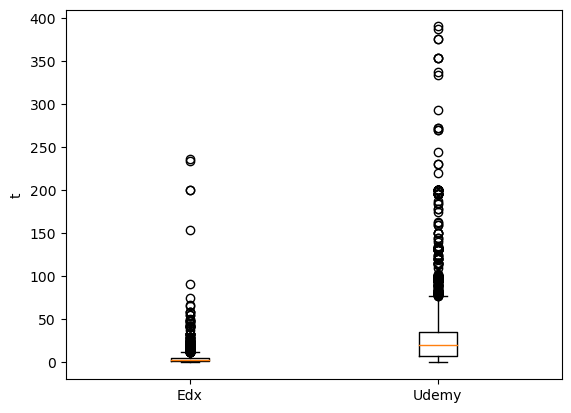

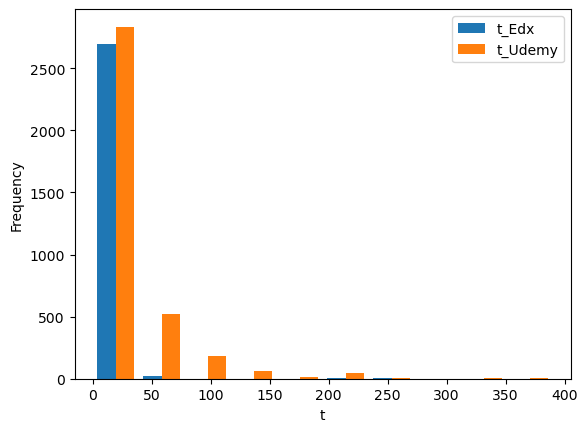

             t_Edx      t_Udemy
count  2729.000000  3671.000000
mean      5.291405    29.998664
std      10.872863    38.986154
min       0.008333     0.000000
25%       1.633333     8.000000
50%       2.857143    20.000000
75%       5.657143    35.714286
max     236.666667   390.000000


In [39]:
# Συνδυασμένο boxplot για τις δύο πλατφόρμες
data1 = [t_Edx,t_Udemy ]
fig, ax = plt.subplots()
ax.boxplot(data1)
ax.set_xticklabels(['Edx','Udemy'])
ax.set_ylabel('t')
plt.show()

# Ιστόγραμμα
plt.hist(data1, bins=10)
plt.xlabel('t')
plt.ylabel('Frequency')
plt.legend(['t_Edx', 't_Udemy'])
plt.show()

# Περιγραφική στατιστική για την μεταβλητή κόστος στις δύο πλατφόρμες
df_t = pd.DataFrame({'t_Edx': t_Edx, 't_Udemy': t_Udemy})
print(df_t.describe())

#### Ενώ το κόστος των μαθημάτως της πλατφόρμας udemy ήταν χαμηλότερο συγκριτικά με το κόστος της Edx παρατηρείται  ότι ο δείκτης t της πλατφόρμας Udemy παίρνει μεγαλύτερες τιμές συγκριτικά με τον αντίστοιχο δείκτη της πλατφόρμας Edx. Επομένως, ενώ φαινομενικά η πλατφόρμα Edx έχει ακριβότερα μαθήματα, η αναλογία κόστος προς φόρτο λαμβάνει χαμηλότερες τιμές.

In [40]:
#Welch's t-test
t, p = stats.ttest_ind(t_Edx,t_Udemy, equal_var=False)
print("Welch's t-test")
print("t-value:", t)
print("p-value:", p)

Welch's t-test
t-value: -36.53409460844902
p-value: 1.479895650804097e-255


#### Το p-value είναι πολύ μικρό, σχεδόν μηδενικό, και η απόρριψη της μηδενικής υπόθεσης σημαίνει ότι υπάρχει στατιστικά σημαντική διαφορά στα μέσα όρια των δεικτών t των δύο δειγμάτων. Με άλλα λόγια, η μέση τιμή της μεταβλητής t_Edx δεν είναι ίση με τη μέση τιμή της μεταβλητής t_Udemy.